# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.2B: Optimistic Greedy

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Now let's implement an optimistic greedy policy based on the policy interface. The optimistic greedy policy initialize the ra to a large initial value R, which is implemented in the __init__() function, and then play the greedy algorithm.

We have given you some boiler plate code, you only need to modify the part as indicated.

In [18]:
#Optimistic Greedy policy
class OptimisticGreedy(Greedy):
    def __init__(self, num_actions, initial_value):
        Greedy.__init__(self, num_actions)
        self.name = "Optimistic Greedy"
        self.initial_value = initial_value
        self.total_rewards[self.total_counts <= 0] = self.initial_value
        
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = self.initial_value
        current_action = np.argmax(current_averages)
        return current_action


Let's prepare the simulation. We'll use the same parameters as the exercise with the epsilon greedy.

In [5]:
evaluation_seed = 5016
num_actions = 10
trials = 10000
distribution = "bernoulli"

First, let's use R = 0. Run the simulation and observe the results.

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

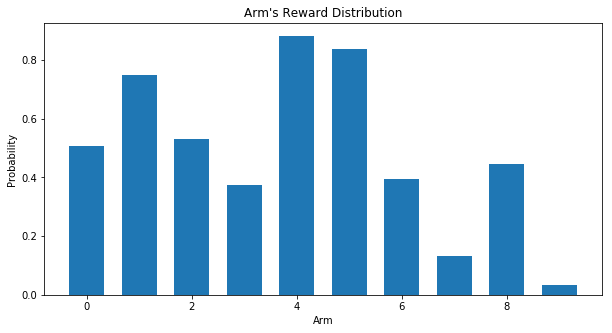

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8739 
Average Regret: 0.0014628501116852397
Arm pulls: [3.000e+00 2.000e+00 6.000e+00 2.000e+00 9.964e+03 4.000e+00 4.000e+00
 2.000e+00 1.100e+01 2.000e+00]


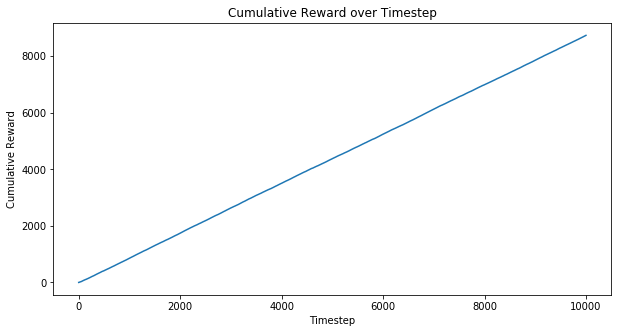

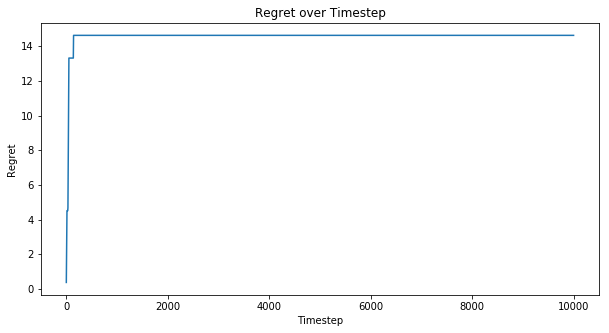

In [28]:
R = 1
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

What about if R is a very large number? Say 10000, the same number as the number of trials? Run the simulation again and observe the results.

Now, try several different number of R (1, 3, 5). Run the simulations and observe the results.

Which epsilon performs best with this problem?

Now let's prepare another simulation by setting a different seed. 

In [25]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"

Try the range of R again (0, 1, 3, 5, 10000), run the simulations and observe the results.